<a href="https://colab.research.google.com/github/olcim04/python_vizualization/blob/main/projekt_sem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Oliwia Cimała MS Informatyka Sem V, 2024/2025 - Projekt

## Wizualizacja i analiza danych

# Analiza danych: Przewidywanie karier studentów informatyki

### Wstęp

Dane pochodzą ze strony Kaggle i są dostępne pod adresem: https://www.kaggle.com/datasets/devildyno/computer-science-students-career-prediction?resource=download (pobrane w dniu 11.12.2024)

Zbió składa się z 12 kolumn i 180 wpisów.

Kolumny:
* Student ID (numer studenta)
* Name (Imię i nazwisko)
* Gender (Płeć)
* Age (Wiek)
* GPA (Średnia ocen)
* Major (Kierunek)
* Interested Domain (Zainteresowania)
* Projects (Projekty)
* Future Career (Przewidywana przyszła praca)
* Python (Stopień znajomości języka Python)
* SQL (Stopień znajomości SQL)
* Java (Stopień znajomości Java)

***

### Importowanie bibliotek oraz danych

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [ ]:
dane = pd.read_csv("C:\\Users\\oliwc\\OneDrive\\Pulpit\\informatyka\\bazy_danych\\cs_students.csv")

***

### Sprawdzanie poprawności wczytanych danych

In [ ]:
dane

,Student ID,Name,Gender,Age,GPA,Major,Interested Domain,Projects,Future Career,Python,SQL,Java
0,1,John Smith,Male,21,3.5,Computer Science,Artificial Intelligence,Chatbot Development,Machine Learning Researcher,Strong,Strong,Weak
1,2,Alice Johnson,Female,20,3.2,Computer Science,Data Science,Data Analytics,Data Scientist,Average,Strong,Weak
2,3,Robert Davis,Male,22,3.8,Computer Science,Software Development,E-commerce Website,Software Engineer,Strong,Strong,Average
3,4,Emily Wilson,Female,21,3.7,Computer Science,Web Development,Full-Stack Web App,Web Developer,Weak,Strong,Strong
4,5,Michael Brown,Male,23,3.4,Computer Science,Cybersecurity,Network Security,Information Security Analyst,Average,Weak,Strong
...,...,...,...,...,...,...,...,...,...,...,...,...
175,176,Elijah Davis,Male,22,3.7,Computer Science,Web Development,Full-Stack Web App,Web Developer,Weak,Strong,Strong
176,177,Emma Johnson,Female,20,3.6,Computer Science,Cybersecurity,Security Auditing,Information Security Analyst,Strong,Average,Weak
177,178,Liam Wilson,Male,21,3.4,Computer Science,Machine Learning,Natural Language Processing,Machine Learning Engineer,Strong,Average,Weak
178,179,Sophia Johnson,Female,22,3.5,Computer Science,Database Management,SQL Database Administration,Database Administrator,Weak,Strong,Average


In [ ]:
dane.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Student ID         180 non-null    int64  
 1   Name               180 non-null    object 
 2   Gender             180 non-null    object 
 3   Age                180 non-null    int64  
 4   GPA                180 non-null    float64
 5   Major              180 non-null    object 
 6   Interested Domain  180 non-null    object 
 7   Projects           180 non-null    object 
 8   Future Career      180 non-null    object 
 9   Python             180 non-null    object 
 10  SQL                180 non-null    object 
 11  Java               180 non-null    object 
dtypes: float64(1), int64(2), object(9)
memory usage: 17.0+ KB


In [ ]:
# Wypisanie kolumn numerycznych z pominięciem Student ID, ponieważ zawiera ona tylko numer studenta
numeric_col = ['Age', 'GPA']

In [ ]:
duplicated_rows = dane.duplicated()
duplicated_rows[duplicated_rows == True].sum()

0

In [ ]:
dane.isna().sum().sum()

0

Jak widać zbiór nie posiada żadnych brakujących danych, ani nie posiada żadnych duplikatów, więc nie ma potrzeby usuwania rekorów.

***

## Analiza podstawowa

## Statystyki zmiennych numerycznych

In [ ]:
dane[numeric_col].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,180.0,22.116667,2.823040,20.0,21.0,22.0,22.25,37.0
GPA,180.0,3.615000,0.177341,3.2,3.5,3.6,3.70,3.9


### Statystyki zmiennych nienumerycznych

In [ ]:
categorical_cols = dane.select_dtypes(exclude=['int', 'float']).columns

for col in categorical_cols:
    print(dane[col].value_counts(), end='\n\n')

Name
James Wilson         8
Olivia Clark         7
Sophia Johnson       6
Michael Brown        6
Laura Lee            6
                    ..
Agent Simmons        1
Agent Fitz           1
Agent Mack           1
Agent Bobbi Morse    1
Morbius              1
Name: count, Length: 89, dtype: int64

Gender
Male      102
Female     78
Name: count, dtype: int64

Major
Computer Science    180
Name: count, dtype: int64

Interested Domain
Artificial Intelligence           19
Web Development                   19
Cybersecurity                     18
Mobile App Development            17
Database Management               16
Cloud Computing                   16
Data Science                      13
Machine Learning                  13
Computer Graphics                 13
Software Development              11
Software Engineering               5
Quantum Computing                  2
Bioinformatics                     2
Human-Computer Interaction         2
Biomedical Computing               2
Distributed

W kolumnie Gender (Płeć) mamy tlyko dwie występujące wartości: Male i Female (Kobieta i Mężczyzna).

Jak możemy zauważyć, w kolumnie Major (Kierunek) znadjuje się tylko jedna wartość: Computer Science, ponieważ wszyscy badani studenci są na tym kierunku.

W kolumnach Python, SQL, Java występują tylko trzy rodzaje wartości: Strong, Weak, Average (Mocny, Średni, Słaby), które oznaczają poziom znajomości danego języka.

W reszcie kolumn występuje więcej zmiennych unikalnych, czyli jest większa

### Zamiana niektórych kolumn na zmienne numeryczne z nienumerycznych

Dokonujemy zmiany wartości w niektórych kolumnach, po sprawdzeniu ich unikalnych wartości, aby móc wykorzystać je bardziej w dalszej analizie.

In [ ]:
# Zamiana w kolumnie płeć wartości kobieta (female) na 1, a mężczyzna (male) na 0
dane['Gender'] = dane['Gender'].map({'Male': 0, 'Female': 1})

In [ ]:
# Zamiana w kolumnach Python, SQL oraz Java wartości na zmienne numeryczne
dane['Python'] = dane['Python'].map({'Strong':3, 'Weak':2, 'Average':1})
dane['SQL'] = dane['SQL'].map({'Strong':3, 'Weak':2, 'Average':1})
dane['Java'] = dane['Java'].map({'Strong':3, 'Weak':2, 'Average':1})

In [ ]:
dane.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Student ID         180 non-null    int64  
 1   Name               180 non-null    object 
 2   Gender             180 non-null    int64  
 3   Age                180 non-null    int64  
 4   GPA                180 non-null    float64
 5   Major              180 non-null    object 
 6   Interested Domain  180 non-null    object 
 7   Projects           180 non-null    object 
 8   Future Career      180 non-null    object 
 9   Python             180 non-null    int64  
 10  SQL                180 non-null    int64  
 11  Java               180 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 17.0+ KB


### Statystyki pojedynczych zmiennych

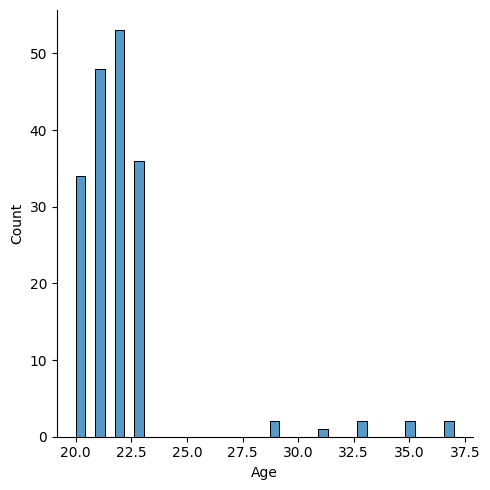

In [ ]:
dane['Age'].describe()
g = sns.displot(x='Age', data=dane, kind='hist')

Jak widać najwięcej studentów jest w wieku z przedziału od 20 do 23 lat.

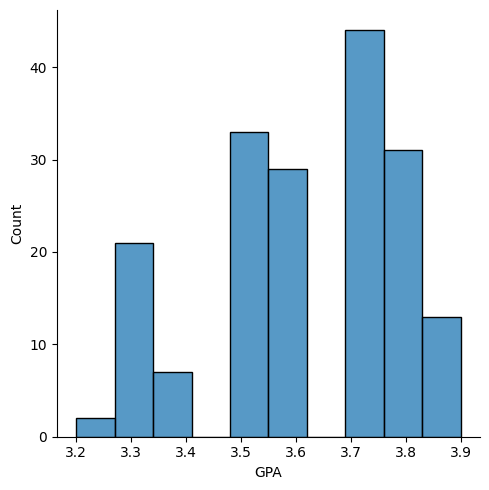

In [ ]:
dane['GPA'].describe()
g = sns.displot(x='GPA', data=dane, kind='hist')

Możemy zauważyć, że najwięcej stunedtów ma GPA w okolicach 3,7 ale także około 3,5. Najmniej studentów natomiast ma średnią która wynosi 3,2.

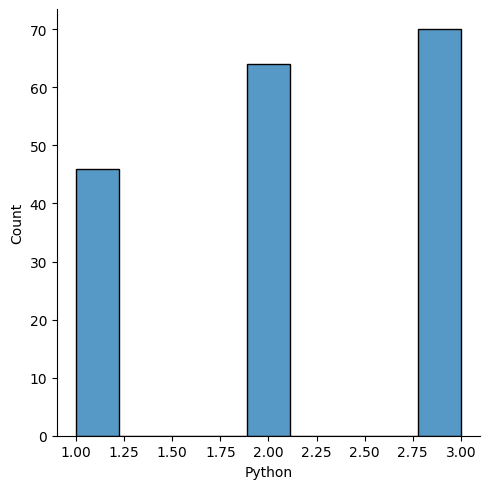

In [ ]:
dane['Python'].describe()
g = sns.displot(x='Python', data=dane, kind='hist')

Uwzględniając, że wartość 1 odpowiada słabej znajomości, wartość 2 odpowiada średniej znajomości, a wartość 3 odpowiada dobrej znajomości języka Python, możemy zauważyć, że najwięcej stundentów określa znajomość tego języka na dobrą.

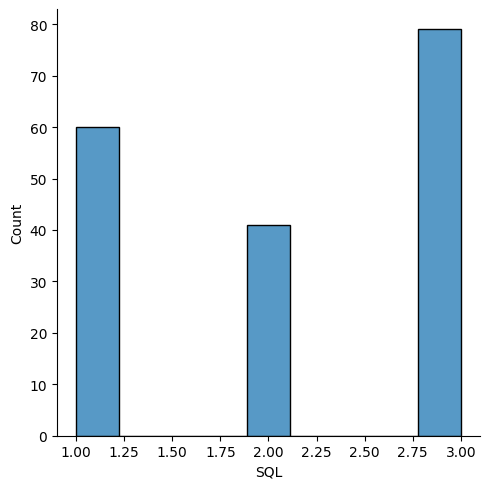

In [ ]:
dane['SQL'].describe()
g = sns.displot(x='SQL', data=dane, kind='hist')

Podobnie jak wprzypadku znajomości języka Python, najwięcej osób określa znajomość SQL na dobrą, natomiast najmniej na średnią. Możemy zauważyć, że w tym przypadku albo studenci określają, że znają ten język, albo że są z nim tylko zaznojomieni, bez żadnego większego zagłębienia się w niego.

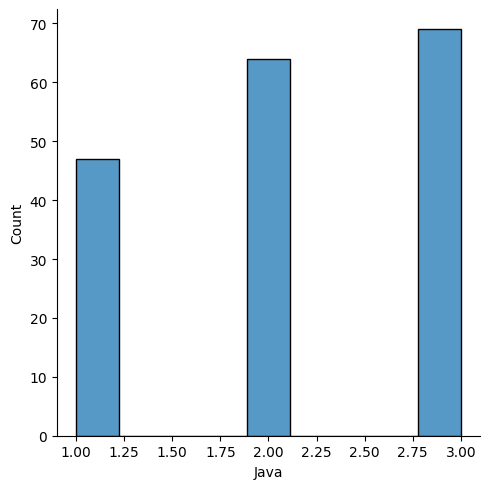

In [ ]:
dane['Java'].describe()
g = sns.displot(x='Java', data=dane)

Jesteśmy w stanie zauważyć, że znajomość języka Java ma podobny rozkład jak języka Python. Czyli najwięcej osób zna go w stopniu dobrym, a najmnniej w stopniu słabym.

***

## Statystyki dla zmiennych

### Zależności pomiędzy poszczególnymi danymi

In [ ]:
dane_nume=dane.select_dtypes(include='number')

<Axes: >

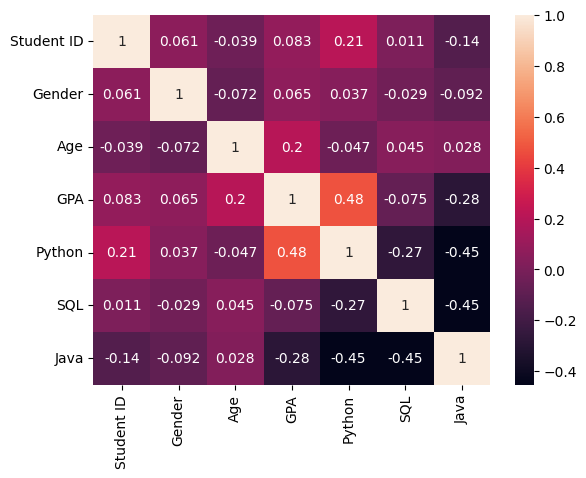

In [ ]:
sns.heatmap(dane_nume.corr(), annot=True)

### Wykres kołowy z podziałem ze względu na przyszłą karierę dla 10 najczęściej występujących

Przewidywane przyszły kariery, według ilości dla osób. 
Future Career
Web Developer                   19
Information Security Analyst    17
Mobile App Developer            17
Database Administrator          16
Cloud Solutions Architect       16
Software Engineer               14
Machine Learning Engineer       13
NLP Research Scientist          11
Graphics Programmer              9
Data Scientist                   8
AI Researcher                    6
Data Analyst                     6
Game Developer                   4
UX Designer                      2
Bioinformatician                 2
Healthcare IT Specialist         2
Quantum Computing Researcher     2
Geospatial Analyst               1
Data Privacy Specialist          1
SEO Specialist                   1
Distributed Systems Engineer     1
Blockchain Engineer              1
VR Developer                     1
Digital Forensics Specialist     1
Machine Learning Researcher      1
NLP Engineer                     1
IoT Developer       

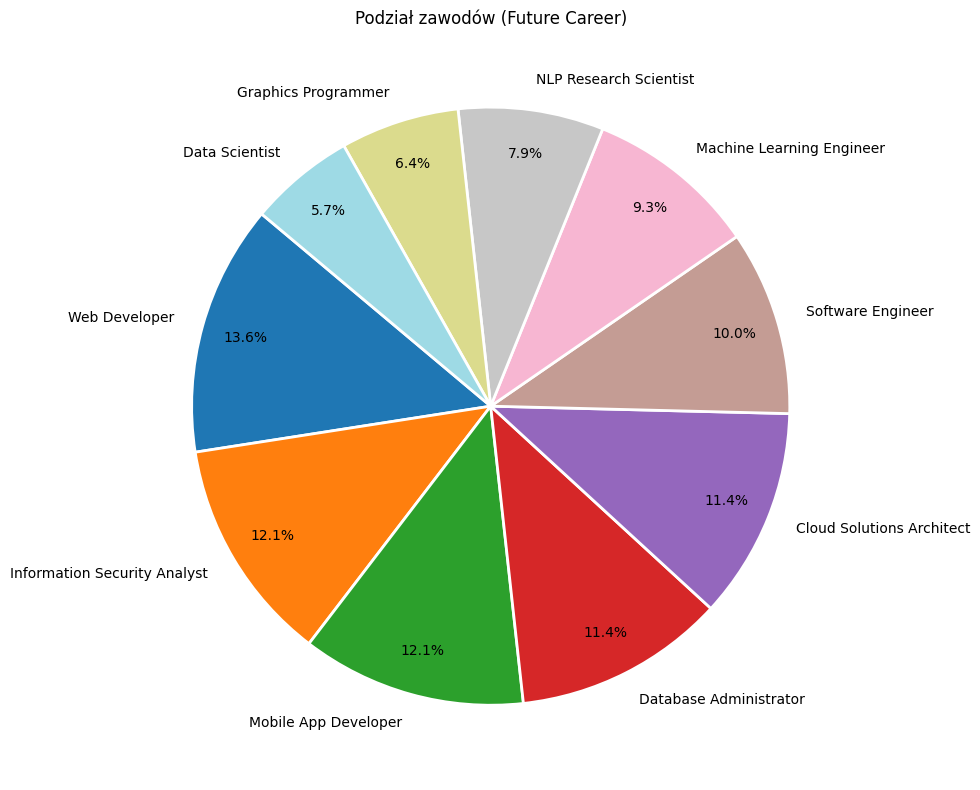

In [ ]:
# Wyciągnięcie wartości jakie posiada kolumna Future Career (przyszłe kariery), oraz zliczenie ich ilości
career_counts = dane['Future Career'].value_counts()
print("Przewidywane przyszły kariery, według ilości dla osób. ")
print(career_counts)

# 10 najczęściej występujących przyszłych karier
top_10 = career_counts.nlargest(10)

# Tworzenie wykresu kołowego
plt.figure(figsize=(10, 8))
top_10.plot.pie(
    autopct='%1.1f%%',  # Procenty na wykresie
    startangle=140,     # Startowy kąt
    colormap='tab20',   # Kolorystyka
    pctdistance=0.85,    # Odległość tekstu procentowego od środka
    wedgeprops={'edgecolor': 'white', 'linewidth': 2}
)
plt.title("Podział zawodów (Future Career)")
plt.ylabel("")
plt.tight_layout()

# Wyświetlenie wykresu
plt.show()

Jak widać najczęściej wybieraną karierą wśród studentów jest Web Developer, a na drugim miejscu znajduje się Information Security Analyst i Mobile App Developer. Te wybory można uznać za dążące za akualnymi popularnościami wśród ludzi, ponieważ coraz więcej osób kożysta z internetu oraz bardzo dużo czasu spędza na telefonach, co powoduje, że coraz więcej firm chcą zapewnić swoim klientom największe korzyści tworzy aplikacje na telefon. Automatycznie coraz większy ruch w internecie ciągnie za sobą coraz większe możliwość dla hakerów oraz innych osób, które korzystają z luk w zabezpieczeniach stron i aplikacji, co generuje większe zapotrzebowanie na ulepszanie zapezbieczeń oraz informacji o sposobach obejścia aktualnych zabezpieczeń.

### Wykres dla wszystkich przyszłych karier

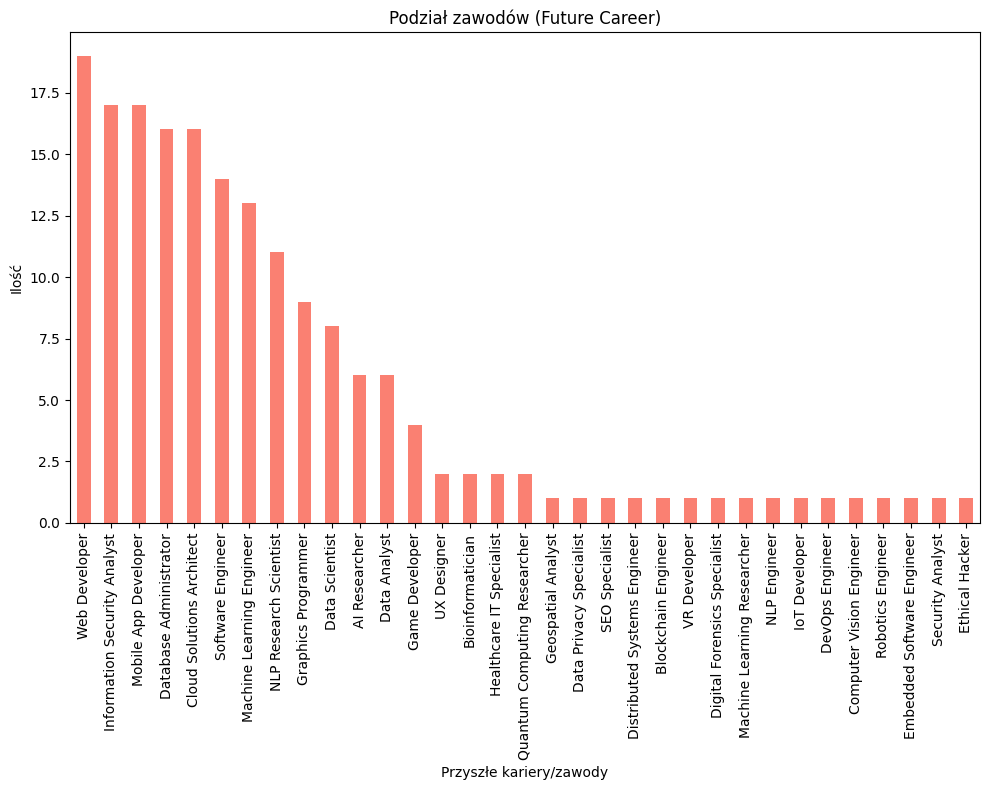

In [ ]:
# Tworzenie wykresu słupkowego dla wszystkich karier
plt.figure(figsize=(10, 8))
career_counts.plot.bar(
    color = 'salmon'
)
plt.title("Podział zawodów (Future Career)")
plt.xlabel("Przyszłe kariery/zawody")
plt.ylabel("Ilość")
plt.tight_layout()

# Wyświetlenie wykresu
plt.show()

### Wykres kołowy z podziałem ze względu na projekty dla 10 najczęściej występujących

Projekty według ilości osób, które je wykonały.
Projects
Natural Language Processing    14
Network Security               14
E-commerce Website             13
SQL Query Optimization          9
AWS Deployment                  8
                               ..
Genomic Data Analysis           1
Medical Imaging Analysis        1
Usability Testing               1
Cloud Migration Specialist      1
Smart Home Automation           1
Name: count, Length: 65, dtype: int64


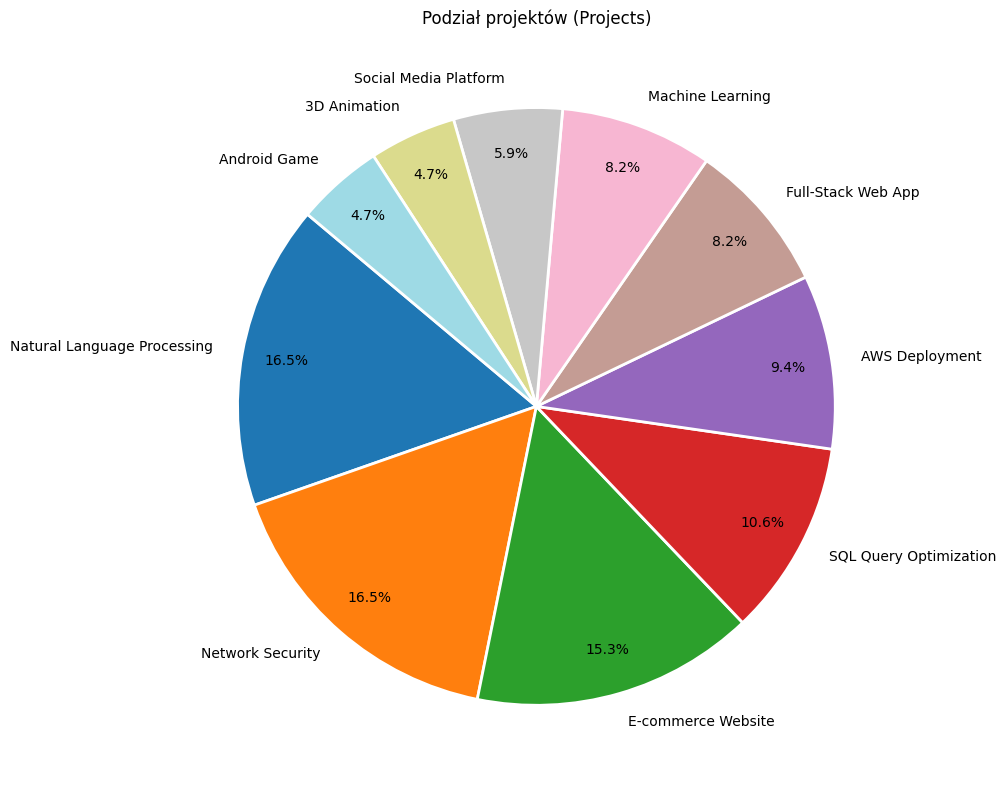

In [ ]:
# Wyciągnięcie wartości jakie posiada kolumna Projects (projekty), oraz zliczenie ich ilości
project_counts = dane['Projects'].value_counts()
print("Projekty według ilości osób, które je wykonały.")
print(project_counts)

# 10 najczęściej występujących projektów
top_10 = project_counts.nlargest(10)

# Tworzenie wykresu kołowego
plt.figure(figsize=(10, 8))
top_10.plot.pie(
    autopct='%1.1f%%',  # Procenty na wykresie
    startangle=140,     # Startowy kąt
    colormap='tab20',   # Kolorystyka
    pctdistance=0.85,   # Odległość tekstu procentowego od środka
    wedgeprops={'edgecolor': 'white', 'linewidth': 2}
)
plt.title("Podział projektów (Projects)")
plt.ylabel("")
plt.tight_layout()

# Wyświetlenie wykresu
plt.show()

Możemy zauważyć, że najcześciej wykonywanymi projektami przez studentów są Natural Language Processing oraz Network Security. Na drugim miejscu znajduje się E-commerce Website.

### Wykres wszystkich projektów

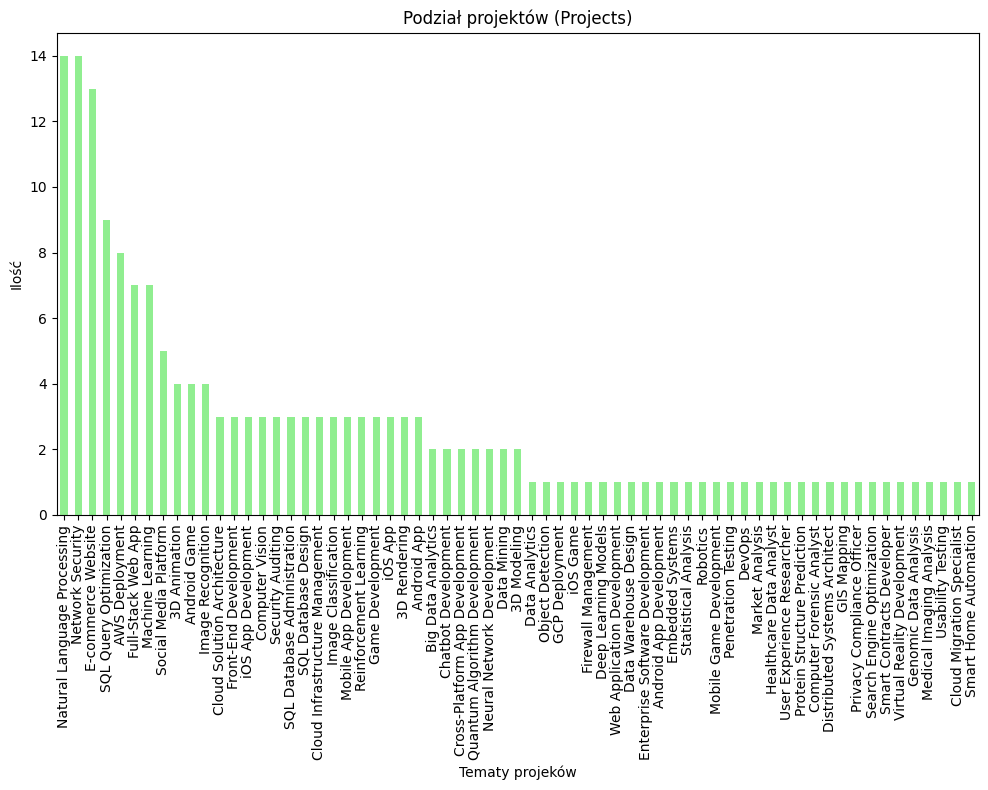

In [ ]:
# Tworzenie wykresu słupkowego dla wszystkich projektów
plt.figure(figsize=(10, 8))
project_counts.plot.bar(
    color = 'lightgreen'
)
plt.title("Podział projektów (Projects)")
plt.xlabel("Tematy projeków")
plt.ylabel("Ilość")
plt.tight_layout()

# Wyświetlenie wykresu
plt.show()

### Wykres pokazujący poziom znajomości dla poszczególnych języków

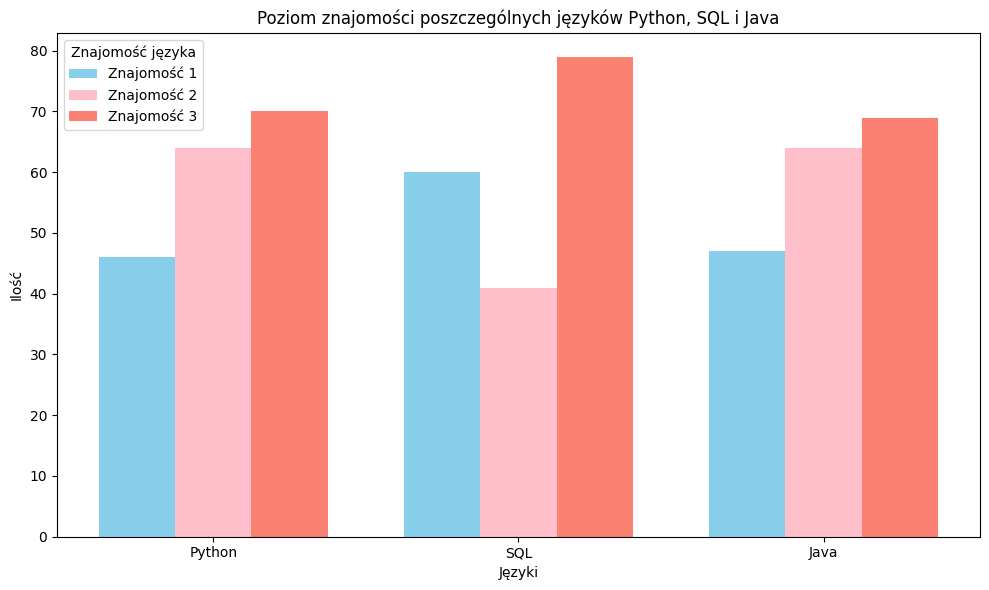

In [ ]:
jezyk = dane[['Python', 'SQL', 'Java']]

counts = jezyk.apply(pd.Series.value_counts).fillna(0)

# Przygotowanie wykresu
labels = counts.columns  # Python, SQL, Java
x = range(len(labels))  # Pozycje na osi X

# Tworzenie słupków dla każdej wartości
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.25
offsets = [-bar_width, 0, bar_width]  # Pozycje słupków
colors = ['skyblue', 'pink', 'salmon']  # Kolory dla wartości 1, 2, 3

for i, value in enumerate(counts.index):  # Iteracja po wartościach (1, 2, 3)
    ax.bar(
        [pos + offsets[i] for pos in x],  # Pozycje przesunięte
        counts.loc[value],  # Ilości
        bar_width,  # Szerokość słupka
        label=f"Znajomość {value}",  # Etykieta dla legendy
        color=colors[i]
    )

# Ustawienia osi i legendy
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_xlabel("Języki")
ax.set_ylabel("Ilość")
ax.set_title("Poziom znajomości poszczególnych języków Python, SQL i Java")
ax.legend(title="Znajomość języka")

plt.tight_layout()
plt.show()

Jak możemy zauważyć rozkład znajomości języka Python i Java są podobne do siebie. Oraz w przypadku wszystkich języków najwięcej studentów określa swoją znajomość poszczególnych języków na dobrą.

### Zależność między GPA a Fututre Carrer

Średnie GPA dla każdej przyszłej kariery:
Future Career
NLP Engineer                    3.900000
Distributed Systems Engineer    3.900000
Data Privacy Specialist         3.800000
Quantum Computing Researcher    3.800000
DevOps Engineer                 3.800000
NLP Research Scientist          3.754545
Machine Learning Engineer       3.746154
Software Engineer               3.721429
Bioinformatician                3.700000
VR Developer                    3.700000
Security Analyst                3.700000
Cloud Solutions Architect       3.681250
Information Security Analyst    3.635294
AI Researcher                   3.633333
Web Developer                   3.631579
Geospatial Analyst              3.600000
Ethical Hacker                  3.600000
Digital Forensics Specialist    3.600000
Graphics Programmer             3.600000
Database Administrator          3.575000
Data Analyst                    3.550000
Embedded Software Engineer      3.500000
Machine Learning Researcher     3.500000
H

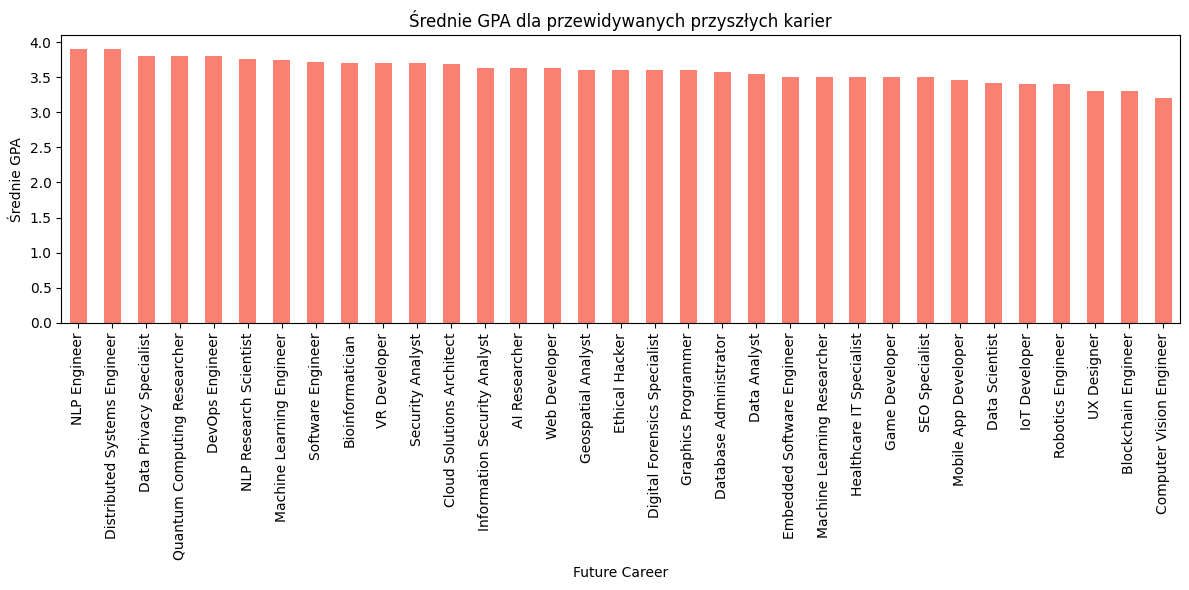

In [ ]:
# Obliczenie średniego GPA dla każdej kariery
avg_gpa_per_career = dane.groupby('Future Career')['GPA'].mean().sort_values(ascending=False)

# Wyświetlenie wyników
print("Średnie GPA dla każdej przyszłej kariery:")
print(avg_gpa_per_career)

# Wizualizacja - wykres słupkowy
plt.figure(figsize=(12, 6))
avg_gpa_per_career.plot(kind='bar', color='salmon')
plt.title("Średnie GPA dla przewidywanych przyszłych karier")
plt.xlabel("Future Career")
plt.ylabel("Średnie GPA")
#plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Największą średnią GPA, czyli 3,9, mają NLP Engineer oraz Distributed System Engierneer.

### Analiza liczby projektów a preferencje zawodowe

Średnia liczba projektów dla każdej przyszłej kariery:
Future Career
AI Researcher                   1.0
Healthcare IT Specialist        1.0
VR Developer                    1.0
UX Designer                     1.0
Software Engineer               1.0
Security Analyst                1.0
SEO Specialist                  1.0
Robotics Engineer               1.0
Quantum Computing Researcher    1.0
NLP Research Scientist          1.0
NLP Engineer                    1.0
Mobile App Developer            1.0
Machine Learning Researcher     1.0
Machine Learning Engineer       1.0
IoT Developer                   1.0
Information Security Analyst    1.0
Graphics Programmer             1.0
Bioinformatician                1.0
Geospatial Analyst              1.0
Game Developer                  1.0
Ethical Hacker                  1.0
Embedded Software Engineer      1.0
Distributed Systems Engineer    1.0
Digital Forensics Specialist    1.0
DevOps Engineer                 1.0
Database Administrator         

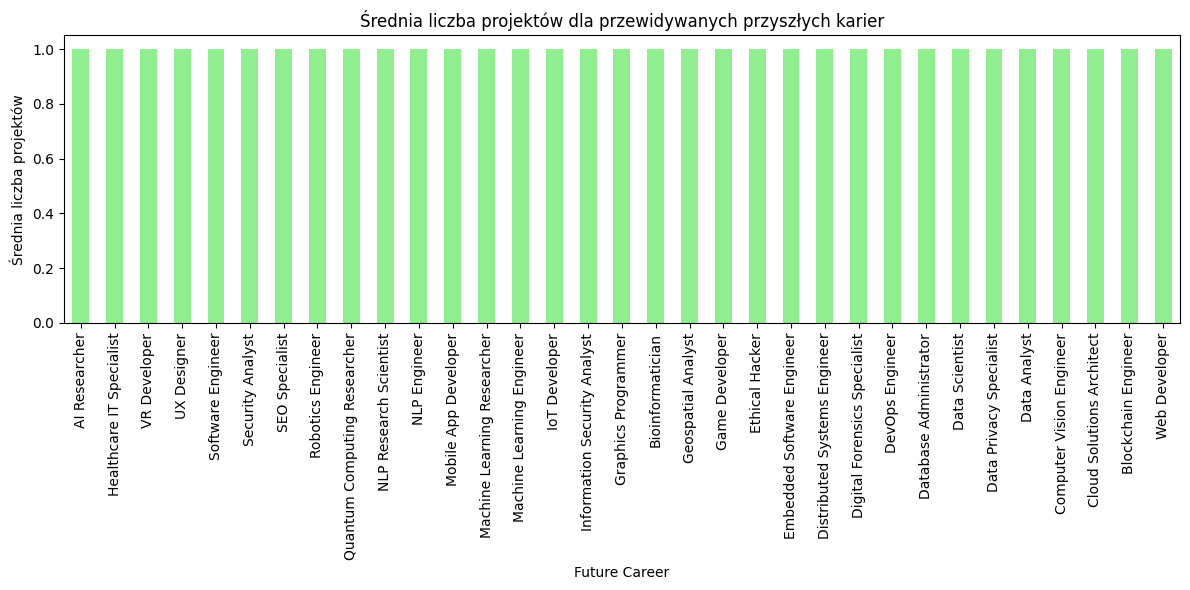

In [ ]:
# czy liczba wykonwnych projektow ma wpływ na wybór przyszłej kariery
# Przekształcenie kolumny 'Projects' na liczbę projektów (jeśli są np. rozdzielone przecinkami)
# Zakładam, że wartości to np. "Project1, Project2", które należy zliczyć
dane['Projects_Count'] = dane['Projects'].apply(lambda x: len(str(x).split(',')))

# Grupowanie: średnia liczba projektów dla każdej przyszłej kariery
avg_projects_per_career = dane.groupby('Future Career')['Projects_Count'].mean().sort_values(ascending=False)

# Wyświetlenie wyników
print("Średnia liczba projektów dla każdej przyszłej kariery:")
print(avg_projects_per_career)

# Wizualizacja wyników
plt.figure(figsize=(12, 6))
avg_projects_per_career.plot(kind='bar', color='lightgreen')
plt.title("Średnia liczba projektów dla przewidywanych przyszłych karier")
plt.xlabel("Future Career")
plt.ylabel("Średnia liczba projektów")
plt.tight_layout()
plt.show()

### Rozkład płci w wybranych karierach

Rozkład płci na wybrane kariery:
Gender                         0  1
Future Career                      
AI Researcher                  3  3
Bioinformatician               0  2
Blockchain Engineer            0  1
Cloud Solutions Architect     10  6
Computer Vision Engineer       0  1
Data Analyst                   3  3
Data Privacy Specialist        0  1
Data Scientist                 6  2
Database Administrator         8  8
DevOps Engineer                1  0
Digital Forensics Specialist   1  0
Distributed Systems Engineer   0  1
Embedded Software Engineer     0  1
Ethical Hacker                 1  0
Game Developer                 3  1
Geospatial Analyst             1  0
Graphics Programmer            3  6
Healthcare IT Specialist       0  2
Information Security Analyst   8  9
IoT Developer                  1  0
Machine Learning Engineer      6  7
Machine Learning Researcher    1  0
Mobile App Developer           8  9
NLP Engineer                   0  1
NLP Research Scientist         

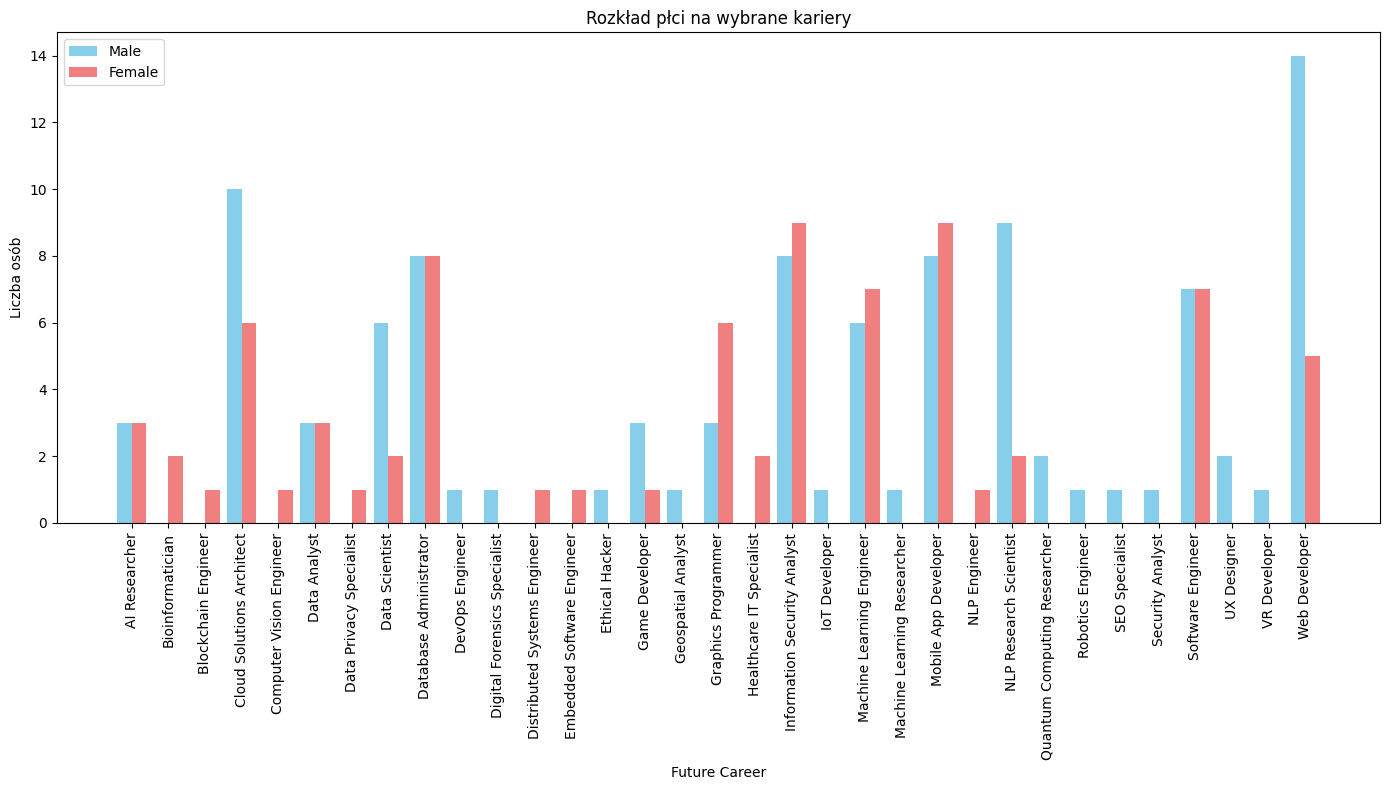

In [ ]:
# czy płeć ma znaczenie na ilość osób w danej karierze, wykres słupkowy z podziałem na płci
# Grupowanie danych: zliczanie liczby mężczyzn i kobiet dla każdej kariery
gender_distribution = dane.groupby(['Future Career', 'Gender']).size().unstack(fill_value=0)

# Wyświetlenie wyników w formie tabeli
print("Rozkład płci na wybrane kariery:")
print(gender_distribution)

# Przygotowanie danych do wykresu
labels = gender_distribution.index  # Kategorie karier
male_counts = gender_distribution[0]  # Liczby dla mężczyzn
female_counts = gender_distribution[1]  # Liczby dla kobiet

x = np.arange(len(labels))  # Pozycje na osi X
width = 0.4  # Szerokość słupków

# Wykres grupowany
fig, ax = plt.subplots(figsize=(14, 8))
bars1 = ax.bar(x - width/2, male_counts, width, label='Male', color='skyblue')
bars2 = ax.bar(x + width/2, female_counts, width, label='Female', color='lightcoral')

# Opis osi i tytuł
ax.set_xlabel("Future Career")
ax.set_ylabel("Liczba osób")
ax.set_title("Rozkład płci na wybrane kariery")
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=90)
ax.legend()

# Wyświetlenie wykresu
plt.tight_layout()
plt.show()

Możemy zauważyć, że niektóre kariery są popularne tylko wśród jendej płci. Jednak największa różnica w popularności występuje dla Web Developer oraz dla NLP Research Scientist (większa popularność wśród panów). A brak różnicy w popularności wśród płci występuje dla Software Engineer, Database Administrator oraz AI Researcher.

### Analiza dominujących umiejętności w różnych karierach

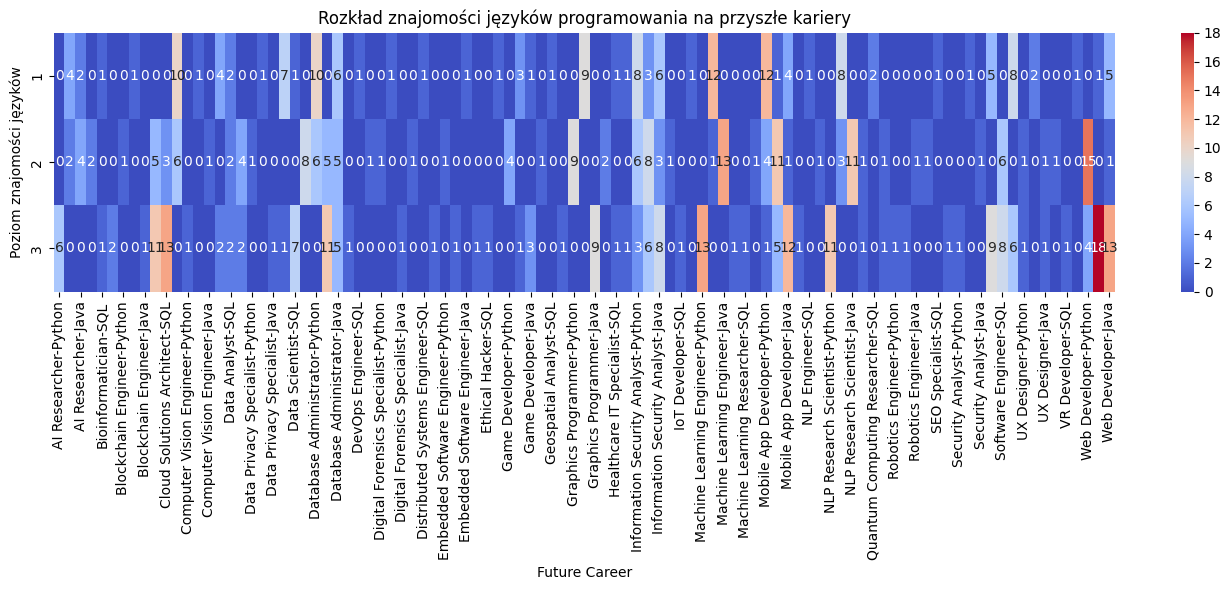

In [ ]:
# heatmapa gdzie mamy kariery i poziomy znajomości różnych języków, jak one są rozlożone (kierunki to wiersze, a języki to kolumny)
# Grupowanie danych: zliczenie znajomości języków dla każdej kariery
language_distribution = dane.groupby('Future Career')[['Python', 'SQL', 'Java']].apply(
    lambda x: x.apply(pd.Series.value_counts).fillna(0)
)

# Przygotowanie danych do heatmapy: sumowanie wyników dla każdego języka
language_distribution = language_distribution.stack().unstack(level=1).fillna(0)

# Wizualizacja - heatmapa dla języków
plt.figure(figsize=(14, 6))
sns.heatmap(language_distribution.T, cmap='coolwarm', annot=True, fmt='.0f')
plt.title("Rozkład znajomości języków programowania na przyszłe kariery")
plt.xlabel("Future Career")
plt.ylabel("Poziom znajomości języków")
plt.tight_layout()
plt.show()

### Analiza dominujących umiejętności w różnych projektach

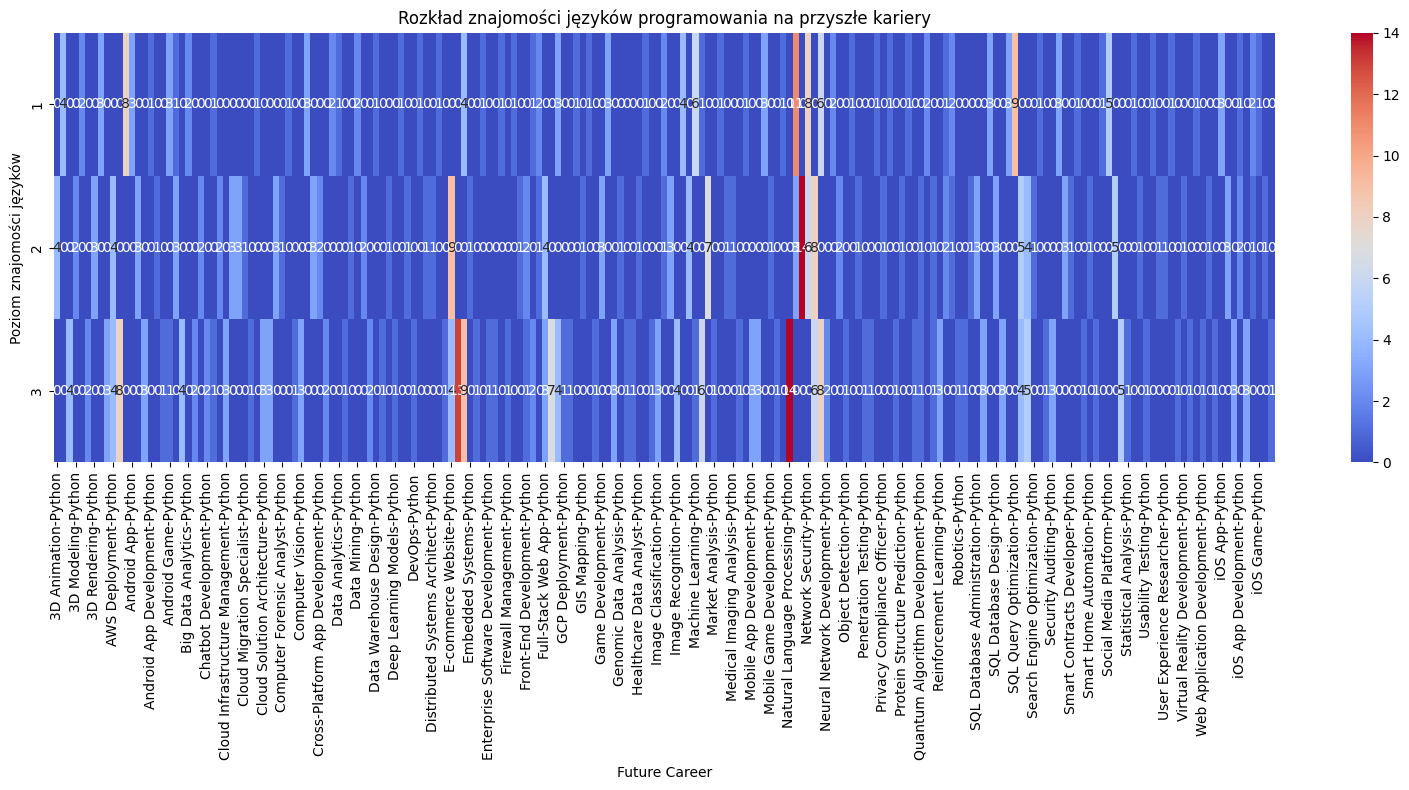

In [ ]:
# heatmapa gdzie mamy kariery i poziomy znajomości różnych projektów, jak one są rozlożone (projekty to wiersze, a języki to kolumny)
# Grupowanie danych: zliczenie znajomości języków dla każdej kariery
projects_distribution = dane.groupby('Projects')[['Python', 'SQL', 'Java']].apply(
    lambda x: x.apply(pd.Series.value_counts).fillna(0)
)

# Przygotowanie danych do heatmapy: sumowanie wyników dla każdego języka
projects_distribution = projects_distribution.stack().unstack(level=1).fillna(0)

# Wizualizacja - heatmapa dla języków
plt.figure(figsize=(16, 8))
sns.heatmap(projects_distribution.T, cmap='coolwarm', annot=True, fmt='.0f')
plt.title("Rozkład znajomości języków programowania na przyszłe kariery")
plt.xlabel("Future Career")
plt.ylabel("Poziom znajomości języków")
plt.tight_layout()
plt.show()

### Rozkład wieku w grupach zawodowych

Średni wiek dla każdej przyszłej kariery:
Future Career
Graphics Programmer             23.222222
Digital Forensics Specialist    23.000000
SEO Specialist                  23.000000
IoT Developer                   23.000000
Ethical Hacker                  23.000000
NLP Research Scientist          22.818182
Cloud Solutions Architect       22.750000
Database Administrator          22.687500
Game Developer                  22.500000
Software Engineer               22.285714
Web Developer                   22.210526
Data Scientist                  22.125000
NLP Engineer                    22.000000
DevOps Engineer                 22.000000
VR Developer                    22.000000
Security Analyst                22.000000
Information Security Analyst    22.000000
Data Privacy Specialist         22.000000
Robotics Engineer               22.000000
Quantum Computing Researcher    22.000000
Embedded Software Engineer      22.000000
Mobile App Developer            21.588235
UX Designer         

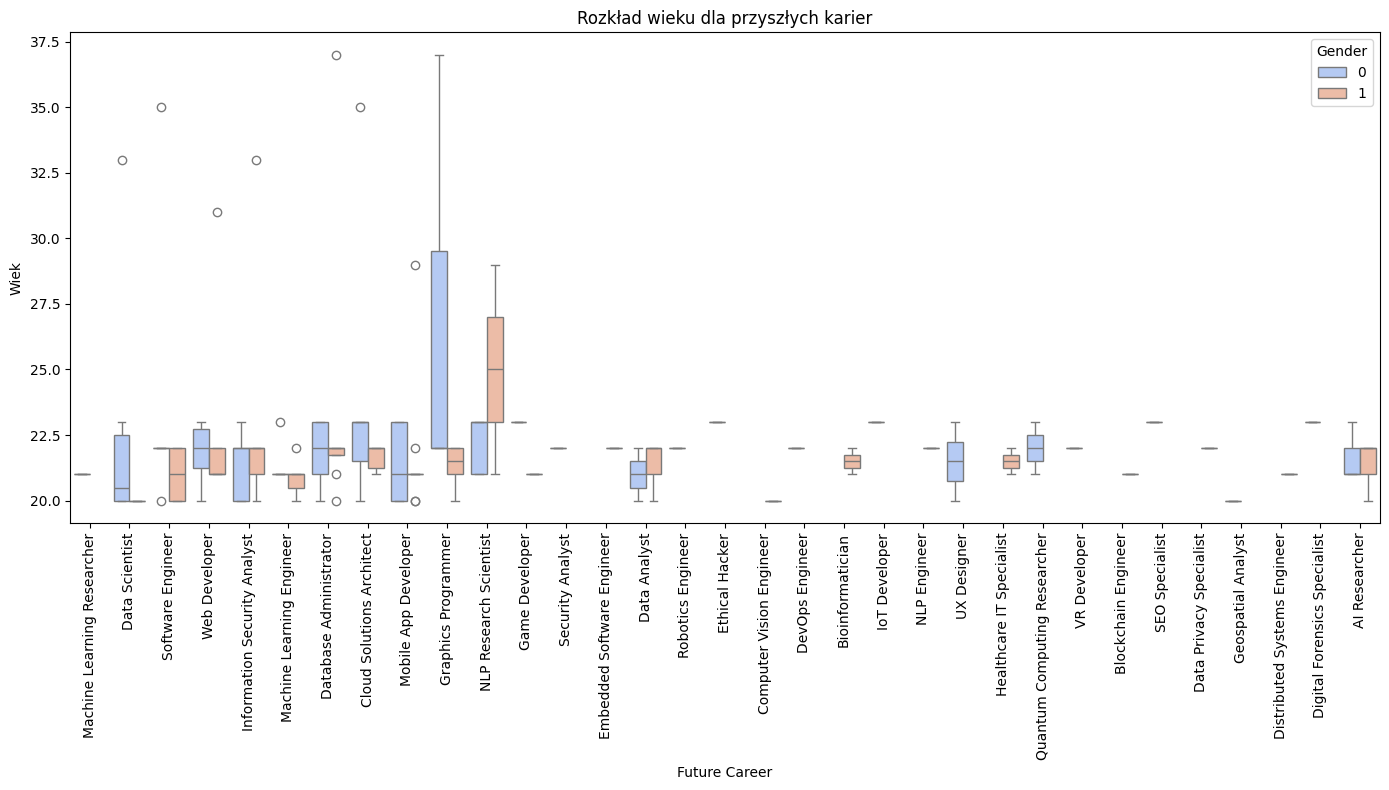

In [ ]:
# sprawdzić czy wiek ma wpływ na wybór kariery
# Obliczanie średniego wieku dla każdej przyszłej kariery
avg_age_per_career = dane.groupby('Future Career')['Age'].mean().sort_values(ascending=False)

# Wyświetlanie wyników
print("Średni wiek dla każdej przyszłej kariery:")
print(avg_age_per_career)

# Wizualizacja wieku w zależności od przyszłej kariery
plt.figure(figsize=(14, 8))
sns.boxplot(data=dane, x='Future Career', y='Age', hue='Gender', palette='coolwarm')
plt.title("Rozkład wieku dla przyszłych karier")
plt.xlabel("Future Career")
plt.ylabel("Wiek")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

1. Różnorodność wieku w karierach:
* Największa rozpiętość wiekowa występuje w przypadku Graphics Programmer – widać osoby młode, ale też znacznie starsze niż średni wiek dla innych zawodów.
* Zawody takie jak Data Scientist, Software Engineer, i Machine Learning Researcher skupiają się wokół młodszego przedziału wiekowego (20–25 lat).

2. Płeć a wiek:
* W niektórych zawodach (np. NLP Research Scientist, Cloud Solutions Architect) występują różnice w wieku między płciami, przy czym mężczyźni (0) i kobiety (1) wydają się mieć różne mediany wieku.
* W przypadku zawodów takich jak Healthcare IT Specialist i Quantum Computing Researcher, liczba próbek dla kobiet jest stosunkowo mała, co ogranicza możliwość analizy.


3. Koncentracja młodszych osób:
* Zawody takie jak Web Developer, IoT Developer, i AI Researcher wydają się bardziej atrakcyjne dla młodszych grup wiekowych.
* Brak osób w starszym wieku w tych zawodach może sugerować nowoczesność i świeżość tych dziedzin.

4. Zawody wymagające dużego doświadczenia:
* W przypadku Graphics Programmer i Cloud Solutions Architect średni wiek jest wyraźnie wyższy. Może to wskazywać na wymóg doświadczenia lub wcześniejszego zaangażowania w podobne obszary.

5. Niewielkie różnice w wybranych zawodach:
* Zawody takie jak Robotics Engineer, Computer Vision Specialist, czy Bioinformatician charakteryzują się podobnym rozkładem wieku i niewielką rozpiętością w medianie wieku obu płci.

Wykres pokazuje, że wiek w dużym stopniu różni się w zależności od przyszłej kariery, co może wynikać z wymagań edukacyjnych, doświadczenia zawodowego lub popularności zawodu wśród różnych grup wiekowych.

Zawody technologiczne i naukowe przyciągają młodsze osoby, ale bardziej wyspecjalizowane dziedziny mogą być preferowane przez starszych uczestników.